Linear Regression Machine Learning Project for Botson House Price Prediction


In [22]:
# Generic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [23]:
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


reading batson dataset

In [24]:
#get the data set

df = pd.read_csv("boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [25]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
df.shape

(506, 14)

In [29]:
df.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,int64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,float64


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [31]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [33]:
target_feature = 'MEDV'

#separate object for target feature
y = df[target_feature]

#separate object for input feature
x = df.drop(target_feature,axis=1)

In [34]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [35]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor()
regression.fit(x_train,y_train)


RandomForestRegressor()

In [59]:
#train_score
train_score=regression.score(x_train,y_train)
print(train_score)

0.97472926757502


In [60]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [61]:
#train_score
train_score=regressor.score(x_train,y_train)
print(train_score)

0.748087259862344


In [62]:
from sklearn.tree import DecisionTreeRegressor
regressors = DecisionTreeRegressor()
regressors.fit(x_train,y_train)

DecisionTreeRegressor()

In [64]:
#train_score
train_score=regressors.score(x_train,y_train)
print(train_score)

1.0


In [72]:
y_pred = regressor.predict(x_test)


In [73]:
from sklearn.metrics import r2_score
round(r2_score(y_test,y_pred)*100,2)


68.44

In [74]:
round(regressor.score(x_test,y_test)*100,2)

68.44

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean absolute error",mean_absolute_error(y_test,y_pred))
print("mean squared error",mean_squared_error(y_test,y_pred))

mean absolute error 3.0609395954370813
mean squared error 22.09869482709832


In [80]:
df1 = pd.DataFrame({'actual':y_test,'predict':y_pred,'variance':y_test-y_pred})
df1.head()

,actual,predict,variance
173,23.6,28.838854,-5.238854
274,32.4,36.007833,-3.607833
491,13.6,15.083248,-1.483248
72,22.8,25.230909,-2.430909
452,16.1,18.878641,-2.778641


In [81]:
df.head(73)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.13554,12.5,6.07,0,0.409,5.594,36.8,6.4980,4,345.0,18.9,396.90,13.09,17.4
69,0.12816,12.5,6.07,0,0.409,5.885,33.0,6.4980,4,345.0,18.9,396.90,8.79,20.9
70,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305.0,19.2,383.73,6.72,24.2
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305.0,19.2,376.94,9.88,21.7


In [85]:
regressor.predict([[0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.23090886])

In [86]:
regressor.intercept_

29.83642016383875

In [87]:
regressor.coef_

array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
       -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
        2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
       -5.17639519e-01])

In [89]:
#get linear coefficient and print them
Ir_coefficient=pd.DataFrame()
Ir_coefficient["columns"]=x_train.columns
Ir_coefficient["Coefficient"]=regressor.coef_
print(Ir_coefficient)

    columns  Coefficient
0      CRIM    -0.128323
1        ZN     0.029552
2     INDUS     0.048859
3      CHAS     2.773503
4       NOX   -16.238829
5        RM     4.368755
6       AGE    -0.009248
7       DIS    -1.400867
8       RAD     0.257761
9       TAX    -0.009957
10  PTRATIO    -0.923123
11        B     0.013185
12    LSTAT    -0.517640


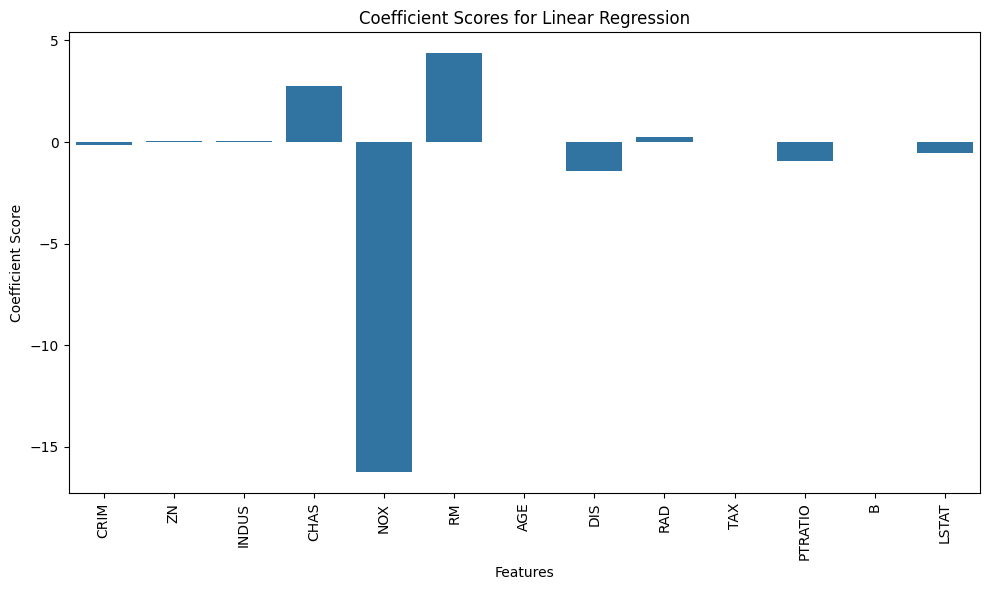

In [91]:
# plotting the coefficient score

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Ir_coefficient' DataFrame is already created as in your code.

plt.figure(figsize=(10, 6))
sns.barplot(x='columns', y='Coefficient', data=Ir_coefficient)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Features")
plt.ylabel("Coefficient Score")
plt.title("Coefficient Scores for Linear Regression")
plt.tight_layout()
plt.show()


In [94]:
# saving the model to the local file system
import pickle
filename = "house_model.pkl"
pickle.dump(regressor,open(filename,'wb'))

In [95]:
#predict the saved model
loaded_model = pickle.load(open(filename,'rb'))
a=loaded_model.predict([[0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52]])
print("Predicted value will be:\n",a)

Predicted value will be:
 [25.23090886]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


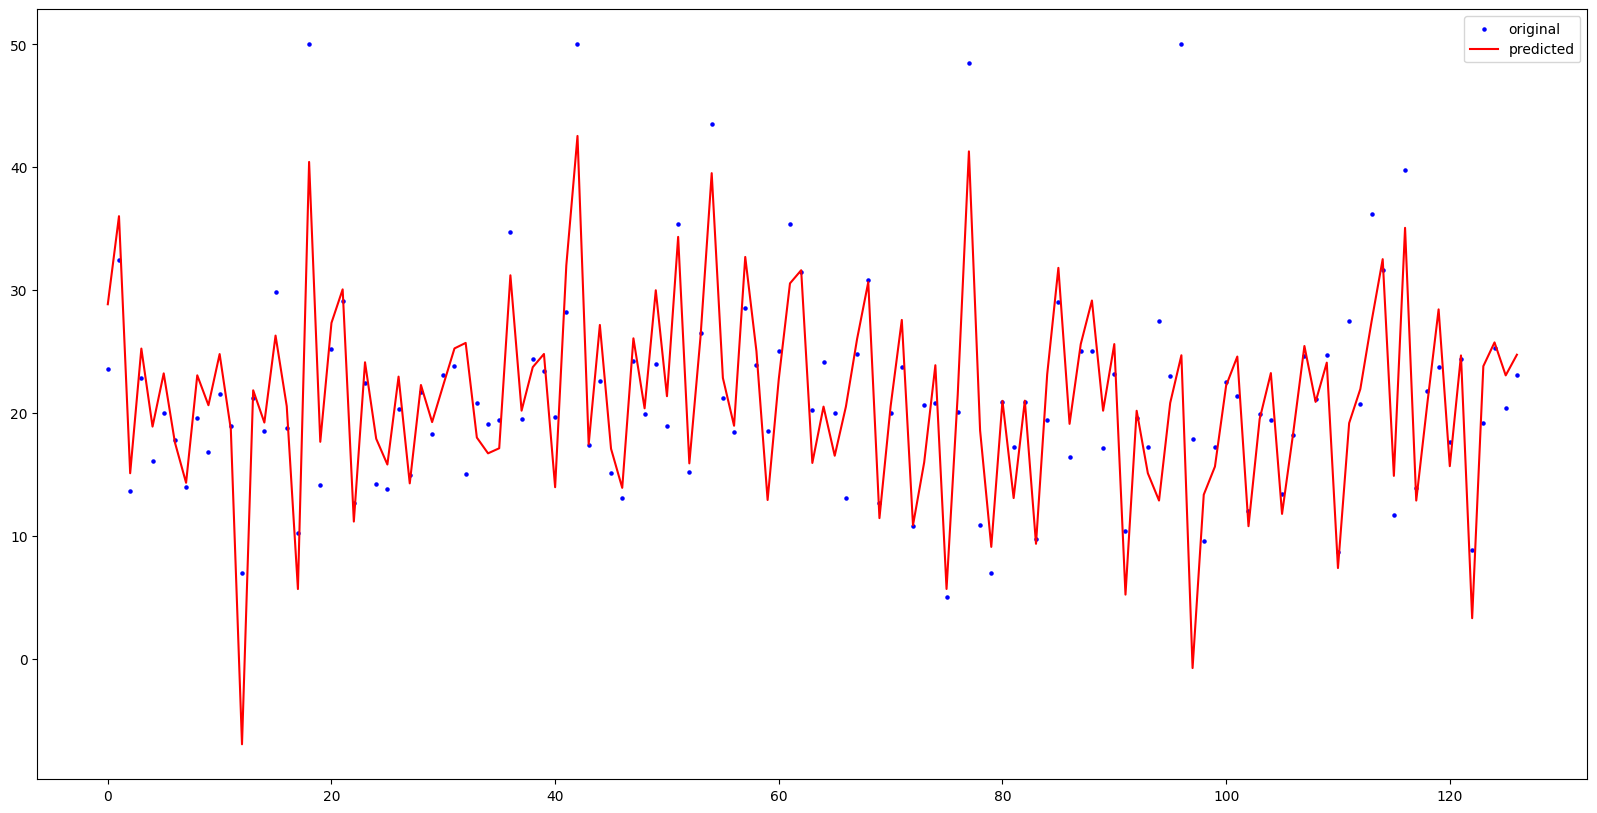

In [96]:
fig,ax = plt.subplots(figsize=(20,10))
x_ax = range(len(y_test))
plt.scatter(x_ax,y_test,s=5,color="blue",label="original")
plt.plot(x_ax,y_pred,color="red",label="predicted")
plt.legend()
plt.show()
